In [3]:
import os.path
import pandas as pd
import orodja
%matplotlib inline

vsi_kovanci = orodja.seznam_kovancev()

pd.options.display.max_rows = 20

def vrni_kovanec(ime):
    return pd.read_csv('./podatki/'+ ime + '.csv')

posamezni_podatki = []
for kovanec in vsi_kovanci:
    if not os.path.isfile('./podatki/'+ kovanec + '.csv'):
        continue
    kovanec_df = vrni_kovanec(kovanec)
    # Dodajanje kolone z imenom kovanca
    kovanec_df['kovanec'] = pd.Series([kovanec] * len(kovanec_df.index), index=kovanec_df.index)
    posamezni_podatki.append(kovanec_df)
kovanci = pd.concat(posamezni_podatki)

In [4]:
kovanci # Vsi podatki o vseh kriptovalutah

,datum,zacetna,najnizja,najvisja,koncna,volumen,kapital,kovanec
0,2017-1-01,963.660000,1003.080000,958.700000,998.330000,147775000.0,1.549120e+10,bitcoin
1,2017-1-02,998.620000,1031.390000,996.700000,1021.750000,222185000.0,1.605510e+10,bitcoin
2,2017-1-03,1021.600000,1044.080000,1021.600000,1043.840000,185168000.0,1.642660e+10,bitcoin
3,2017-1-04,1044.400000,1159.420000,1044.400000,1154.730000,344946000.0,1.679540e+10,bitcoin
4,2017-1-05,1156.730000,1191.100000,910.420000,1013.380000,510199000.0,1.860400e+10,bitcoin
5,2017-1-06,1014.240000,1046.810000,883.940000,902.200000,351876000.0,1.631410e+10,bitcoin
6,2017-1-07,903.490000,908.590000,823.560000,908.590000,279550000.0,1.453440e+10,bitcoin
7,2017-1-08,908.170000,942.720000,887.250000,911.200000,158715000.0,1.461140e+10,bitcoin
8,2017-1-09,913.240000,913.690000,879.810000,902.830000,141877000.0,1.469490e+10,bitcoin
9,2017-1-10,902.440000,914.870000,901.060000,907.680000,115808000.0,1.452260e+10,bitcoin


In [5]:
zdruzeni_podatki = kovanci.groupby('kovanec')
zdruzeni_podatki.index = zdruzeni_podatki['datum']
najvrednejsi_kovanci = zdruzeni_podatki['kapital'].max().sort_values(ascending=False)[:10]

Najvrednejši kovanci po maksimalnem kapitalu v naboru podatkov

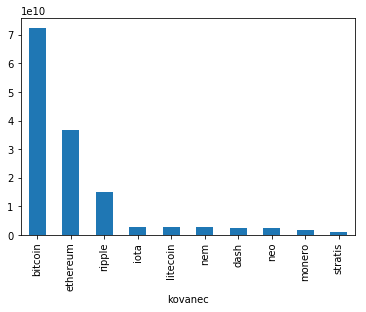

In [6]:
najvrednejsi_kovanci.plot(kind='bar')

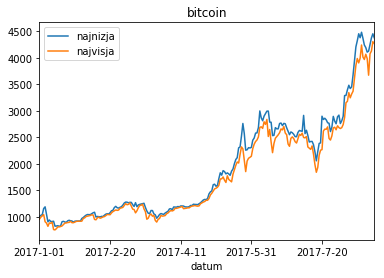

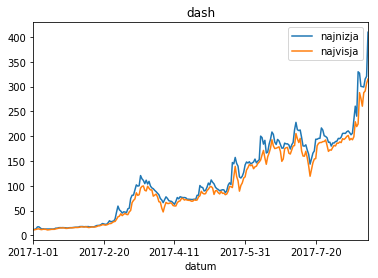

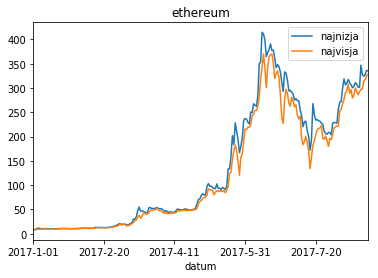

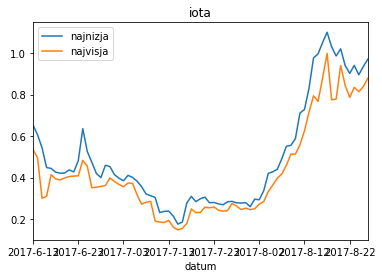

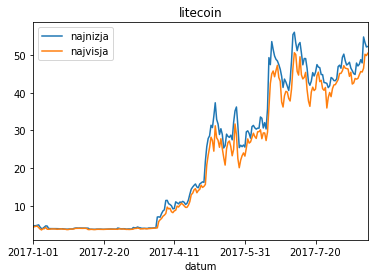

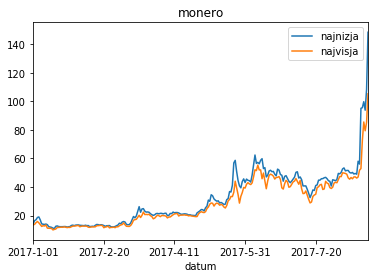

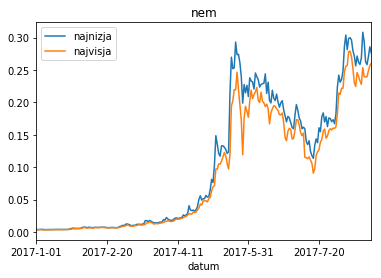

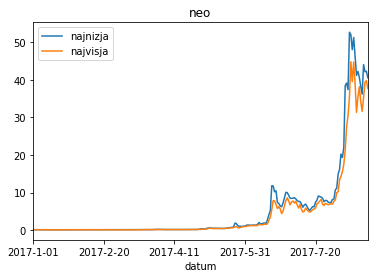

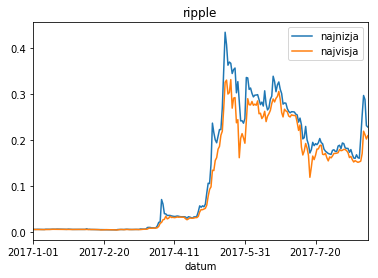

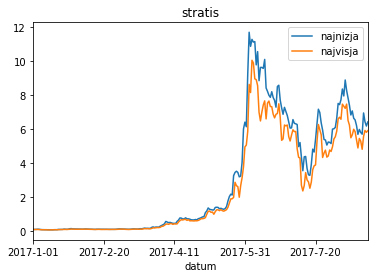

In [17]:
for ime, k in kovanci[kovanci['kovanec'].isin(najvrednejsi_kovanci.index)].groupby('kovanec'):
    k.plot(kind='line', x='datum', y=['najnizja', 'najvisja'], title=ime)